# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd

train = pd.read_csv('data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Drop the Id columns from both train and test as these are not needed for prediction

In [2]:
test = pd.read_csv('data/test.csv')

drop_cols = ['Id']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

#### Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

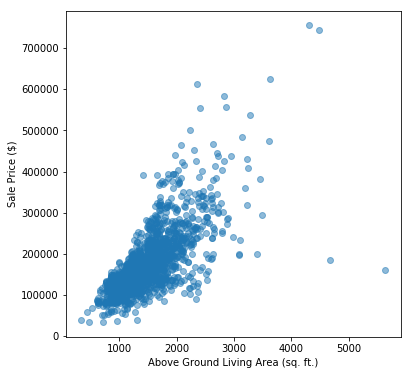

In [4]:
fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)

ax.set_ylabel('Sale Price ($)')
ax.set_xlabel('Above Ground Living Area (sq. ft.)')

plt.show()

# There are outliers for GrLivArea > 4,000 sq. ft., 
# but most of the points are within SalePrice < $400,000 and GrLivArea < 3,000 sq. ft.

#### Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

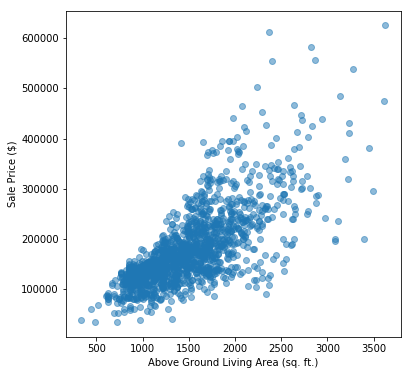

In [5]:
# Remove outliers for train['GrLivArea']>4000
cond = (train['GrLivArea']<4000)
train = train[cond].reset_index(drop=True)


fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)

ax.set_ylabel('Sale Price ($)')
ax.set_xlabel('Above Ground Living Area (sq. ft.)')

plt.show()

#### Convert categorical variable into dummy variables using pandas get_dummies API


In [6]:
train = pd.get_dummies(train)

#### Impute missing data by the mean of each column.

In [7]:
train.isnull().sum()

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
                        ... 
GarageCond_TA              0
PavedDrive_N               0
PavedDrive_P               0
PavedDrive_Y  

In [8]:
#Command(s):
train = train.fillna(train.mean())

In [9]:
train.isnull().sum().sum()

0

Generate train test split 70/30

In [10]:
from sklearn.model_selection import train_test_split

target = 'SalePrice'
features = list(train.drop(target,axis=1).columns.values)

X = train[features]
y = train[target]


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = X#sc.fit_transform(X)
y_scaled = y#(y - y.min()) / (y.max() - y.min())

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=23)

## Linear Regression

In [11]:
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import sqrt

reg = LinearRegression(normalize=False).fit(X_train, y_train)

y_predicted_train = reg.predict(X_train)
y_predicted_test = reg.predict(X_test)

#Compute the RMSE 
rmse_train = sqrt(mean_squared_error(y_train, y_predicted_train))
rmse_test = sqrt(mean_squared_error(y_test, y_predicted_test))

print("Root Mean Squared Error: train set = %.1f, test set = %.1f" % (rmse_train, rmse_test))

Root Mean Squared Error: train set = 17322.2, test set = 29924.9


## Lasso Regression

#### Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)

In [12]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=20).fit(X_train, y_train)

#Compute the RMSE 
y_predicted_train = lasso.predict(X_train)
y_predicted_test = lasso.predict(X_test)


#Compute the RMSE 
rmse_train = sqrt(mean_squared_error(y_train, y_predicted_train))
rmse_test = sqrt(mean_squared_error(y_test, y_predicted_test))

print("Root Mean Squared Error: train set = %.1f, test set = %.1f" % (rmse_train, rmse_test))

Root Mean Squared Error: train set = 17895.8, test set = 25982.9


In [13]:
def run_lasso_regression(alpha):
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)

    y_predicted_train = lasso.predict(X_train)
    y_predicted_test = lasso.predict(X_test)

    #Compute the RMSE 
    rmse_train = sqrt(mean_squared_error(y_train, y_predicted_train))
    rmse_test = sqrt(mean_squared_error(y_test, y_predicted_test))
    
    num_nonzero_coef = len([x for x in lasso.coef_ if x != 0])

    print("Alpha = %6.1f, RMSE: train set = %.2f, test set = %.2f, number of parameters = %3d" % (alpha, 
                                                                                                  rmse_train, 
                                                                                                  rmse_test, num_nonzero_coef))

In [14]:
alphas = [0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

for a in alphas:
    run_lasso_regression(a)

Alpha =    0.1, RMSE: train set = 17322.38, test set = 29718.88, number of parameters = 259
Alpha =    1.0, RMSE: train set = 17337.38, test set = 29517.93, number of parameters = 255
Alpha =    5.0, RMSE: train set = 17404.90, test set = 28259.68, number of parameters = 241
Alpha =   10.0, RMSE: train set = 17555.31, test set = 27133.34, number of parameters = 231
Alpha =   20.0, RMSE: train set = 17895.76, test set = 25982.91, number of parameters = 200
Alpha =   50.0, RMSE: train set = 18695.39, test set = 24118.52, number of parameters = 152
Alpha =  100.0, RMSE: train set = 19696.99, test set = 23638.03, number of parameters = 108
Alpha =  500.0, RMSE: train set = 22828.80, test set = 25812.45, number of parameters =  55
Alpha = 1000.0, RMSE: train set = 24970.65, test set = 27560.73, number of parameters =  39


#### How many columns has the model chosen?

In [15]:
run_lasso_regression(alpha=20)
# For alpha = 20, the number of parameters selected is 200

Alpha =   20.0, RMSE: train set = 17895.76, test set = 25982.91, number of parameters = 200


## Ridge Regression

#### Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range). 

In [16]:
def run_ridge_regression(alpha):
    ridge = linear_model.Ridge(alpha=alpha, normalize=True).fit(X_train, y_train)

    y_predicted_train = ridge.predict(X_train)
    y_predicted_test = ridge.predict(X_test)

    #Compute the RMSE 
    rmse_train = sqrt(mean_squared_error(y_train, y_predicted_train))
    rmse_test = sqrt(mean_squared_error(y_test, y_predicted_test))

    print("Alpha = %6.3f, RMSE: train set = %.2f, test set = %.2f" % (alpha, rmse_train, rmse_test))

In [17]:
alphas = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0]

for a in alphas:
    run_ridge_regression(a)

Alpha =  0.001, RMSE: train set = 17324.73, test set = 29868.19
Alpha =  0.010, RMSE: train set = 17372.59, test set = 29352.99
Alpha =  0.050, RMSE: train set = 17602.66, test set = 28202.53
Alpha =  0.100, RMSE: train set = 17891.33, test set = 27363.27
Alpha =  0.250, RMSE: train set = 18720.24, test set = 26311.25
Alpha =  0.500, RMSE: train set = 19957.08, test set = 26149.94
Alpha =  0.750, RMSE: train set = 21053.54, test set = 26581.21
Alpha =  1.000, RMSE: train set = 22049.96, test set = 27211.92


#### What is your root mean squared error (RMSE)? Comment on your observation.

In [18]:
#The RMSE for alpha = 0.1 is 27363.27
#The RMSE is slightly lower for higher alpha, around alpha = 0.50

## Elastic Net Regression

#### Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [19]:
def run_elastic_net_regression(alpha):
    elasticnet = linear_model.ElasticNet(alpha=alpha, normalize=False, max_iter=10000).fit(X_train, y_train)

    y_predicted_train = elasticnet.predict(X_train)
    y_predicted_test = elasticnet.predict(X_test)

    #Compute the RMSE 
    rmse_train = sqrt(mean_squared_error(y_train, y_predicted_train))
    rmse_test = sqrt(mean_squared_error(y_test, y_predicted_test))

    print("Alpha = %6.2f, RMSE: train set = %.2f, test set = %.2f" % (alpha, rmse_train, rmse_test))

In [20]:
alphas = [0.01, 0.1, 20]

for a in alphas:
    run_elastic_net_regression(a)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Alpha =   0.01, RMSE: train set = 18474.66, test set = 23846.66
Alpha =   0.10, RMSE: train set = 20704.65, test set = 24456.04
Alpha =  20.00, RMSE: train set = 31421.71, test set = 33436.67
